<a href="https://colab.research.google.com/github/RareDiseaseData/Meta-analysis-data/blob/main/simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [ ]:
df_patient = pd.read_csv("content/Hyl_Patient_data.csv")
df_patient = df_patient[[
    'ID',
    'Cell1', # 1 fibroblast or 2 bone
    'Age',
    'Sex',
    'Type', # severity of the pain (not linear)
    # 'n',
    'Method', # quemistry method used for the extraction
    '%hydroxylysine_ind', # outcome for ipd
    # 'STD_n1', # within study std
    # 'STD_n2' # within study std within type
]]

df_control = pd.read_csv("content/Hyl_Control_data.csv")
df_control = df_control[[
    'ID',
    'Cell1', # 1 fibroblast or 2 bone
    'Age',
    'Sex',
    'Type', # severity of the pain (not linear)
    # 'n',
    'Method', # quemistry method used for the extraction
    '%hydroxylysine_ind', # outcome for ipd
    # 'STD_n1', # within study std
    # 'STD_n2' # within study std within type
]]

In [ ]:
df_patient[df_patient.isna().any(axis=1)]

,ID,Cell1,Age,Sex,Type,Method,%hydroxylysine_ind


In [ ]:
df = pd.concat([df_patient, df_control])
df

,ID,Cell1,Age,Sex,Type,n,Method,%hydroxylysine_ind
0,6,2,2,1,9,1.0,1,0.465116
1,8,2,1,1,2,1.0,2,0.219020
2,15,1,1,2,2,3.0,5,0.218750
3,15,2,1,2,2,NaN,3,0.371429
4,15,2,1,2,2,NaN,3,0.352941
...,...,...,...,...,...,...,...,...
42,207,1,5,3,10,NaN,7,0.243000
43,243,1,2,3,10,NaN,7,0.198000
44,265,1,5,3,10,NaN,7,0.235000
45,352,1,5,3,10,NaN,7,0.210000


## Preprocessing

In [ ]:
df.columns

Index(['ID', 'Cell1', 'Age', 'Sex', 'Type', 'n', 'Method',
       '%hydroxylysine_ind'],
      dtype='object')

In [ ]:
df_sel = df.copy()

We suppose two articles have irregularities.

In [ ]:
df_sel[df_sel.ID == 61] # aggregate; maybe something went wrong here

,ID,Cell1,Age,Sex,Type,n,Method,%hydroxylysine_ind
15,61,1,2,3,1,3.0,5,0.129901
16,61,1,1,3,2,5.0,5,0.260990
17,61,1,5,3,3,12.0,5,0.140198
18,61,1,5,3,4,3.0,5,0.121188
19,61,2,2,3,1,3.0,3,0.134257
20,61,2,1,3,2,5.0,3,0.271683
21,61,2,5,3,3,12.0,3,0.114455
22,61,2,5,3,4,3.0,3,0.152079
14,61,1,1,3,10,2.0,5,0.189307
15,61,1,4,3,10,8.0,5,0.123168


In [ ]:
df_sel[df_sel.ID == 75] # Did not report the method, values significantly lower
df_sel.loc[df_sel.ID == 75, 'Method'] = -1
df_sel[df_sel.ID == 75]

,ID,Cell1,Age,Sex,Type,n,Method,%hydroxylysine_ind
24,75,1,3,3,9,3.0,-1,0.241
25,75,1,1,3,9,NaN,-1,0.196
26,75,1,4,3,9,NaN,-1,0.151
20,75,1,3,3,10,3.0,-1,0.125
21,75,1,1,3,10,NaN,-1,0.146
22,75,1,4,3,10,NaN,-1,0.134


In [ ]:
idx = df_sel.loc[(df_sel.ID == 61) | (df_sel.ID == 75)].index
df_sel['errors'] = 'Others'
df_sel.loc[df_sel.ID == 61, 'errors'] = '61'
df_sel.loc[df_sel.ID == 75, 'errors'] = '75'

## Outlier detection

- [x] Reason to remove them (Priyesh)

Grubb's Test
- [x] https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/
- [x] https://towardsdatascience.com/5-outlier-detection-methods-that-every-data-enthusiast-must-know-f917bf439210

- DBSCAN: https://medium.com/@dilip.voleti/dbscan-algorithm-for-fraud-detection-outlier-detection-in-a-data-set-60a10ad06ea8

In [ ]:
def grubbs_test(x, x_test):
    m = x.mean()
    std = x.std()
    g = (x - m) / std
    return abs(g)

In [ ]:
from outliers import smirnov_grubbs as grubbs

In [ ]:
len(df_patient['%hydroxylysine_ind'].values)

69

In [ ]:
df_sel['%hydroxylysine_ind']
len(grubbs.test(df_patient['%hydroxylysine_ind'].values, alpha = 0.1))

69

In [ ]:
a = df_sel[df_sel['Type'] == 9].ID

In [ ]:
df_sel[df_sel.ID.isin(a)].sort_values('ID')

,ID,Cell1,Age,Sex,Type,n,Method,%hydroxylysine_ind,errors
0,6,2,2,1,9,1.0,1,0.465116,Others
0,6,2,2,1,10,NaN,1,0.395257,Others
13,46,1,5,3,9,1.0,5,0.365854,Others
12,46,1,5,3,10,NaN,5,0.239825,Others
24,75,1,3,3,9,3.0,-1,0.241000,75
25,75,1,1,3,9,NaN,-1,0.196000,75
26,75,1,4,3,9,NaN,-1,0.151000,75
20,75,1,3,3,10,3.0,-1,0.125000,75
21,75,1,1,3,10,NaN,-1,0.146000,75
22,75,1,4,3,10,NaN,-1,0.134000,75


In [ ]:
df_sel.Type.value_counts().sort_index()

1      9
2     19
3     17
4     18
9      6
10    47
Name: Type, dtype: int64

We are dropping the 6 patients that have OI type 9 because that is unknown (equal to NaN or NULL).

In [ ]:
df_sel = df_sel.drop(a.index)
df_sel

,ID,Cell1,Age,Sex,Type,n,Method,%hydroxylysine_ind,errors
1,8,2,1,1,2,1.0,2,0.219020,Others
2,15,1,1,2,2,3.0,5,0.218750,Others
3,15,2,1,2,2,NaN,3,0.371429,Others
4,15,2,1,2,2,NaN,3,0.352941,Others
5,25,1,1,1,2,2.0,5,0.294000,Others
...,...,...,...,...,...,...,...,...,...
42,207,1,5,3,10,NaN,7,0.243000,Others
43,243,1,2,3,10,NaN,7,0.198000,Others
44,265,1,5,3,10,NaN,7,0.235000,Others
45,352,1,5,3,10,NaN,7,0.210000,Others


## DBSCAN test

For this test, we need data that has no null variables, so for this we take out all of the columns with null values.

In [ ]:
df_dbscan = dataset[[
    "Cell1",
    "Type",
    "Method",
    "%hydroxylysine_ind"
    ]]
df_dbscan.rename(columns = {'%hydroxylysine_ind':'hydroxylysine_ind'}, inplace = True)
df_dbscan

<ipython-input-10-1a440fb037e8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dbscan.rename(columns = {'%hydroxylysine_ind':'hydroxylysine_ind'}, inplace = True)


,Cell1,Type,Method,hydroxylysine_ind
0,2,9,1,0.465116
1,2,2,2,0.219020
2,1,2,5,0.218750
3,2,2,3,0.371429
4,2,2,3,0.352941
...,...,...,...,...
64,1,4,5,0.370504
65,1,4,5,0.412710
66,1,4,5,0.423261
67,1,4,5,0.425180


In [ ]:
df_dbscan.isna().sum()

Cell1                0
Type                 0
Method               0
hydroxylysine_ind    0
dtype: int64

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import os

from scipy.cluster.vq import kmeans
from scipy.cluster.vq import vq

import plotly.express as px
from sklearn.ensemble import IsolationForest

In [ ]:
df_dbscan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cell1              69 non-null     int64  
 1   Type               69 non-null     int64  
 2   Method             69 non-null     int64  
 3   hydroxylysine_ind  69 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 2.3 KB


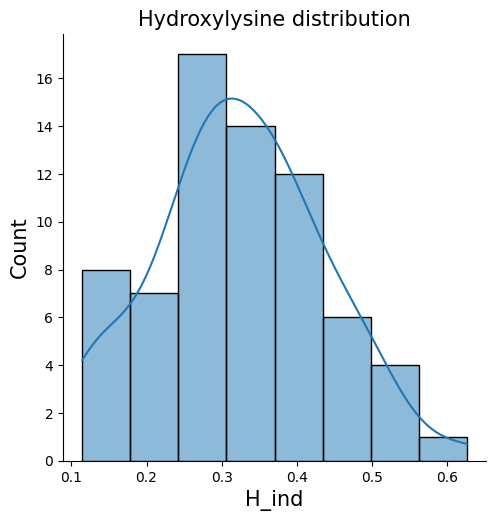

In [ ]:
sns.displot(df_dbscan['hydroxylysine_ind'],
           kde = True)

#label the axis
plt.xlabel("H_ind", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Hydroxylysine distribution", fontsize = 15)

plt.show()

In [ ]:
print(f"skewness: {df_dbscan['hydroxylysine_ind'].skew():.2f}")
print(f"Kurtosis: {df_dbscan['hydroxylysine_ind'].kurt():.2f}")

skewness: 0.14
Kurtosis: -0.12


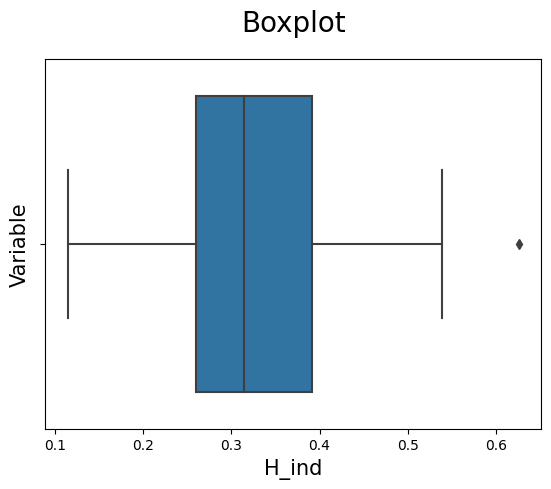

In [ ]:
#create the boxplot
ax = sns.boxplot(x = df_dbscan['hydroxylysine_ind'])

#add labels to the plot
ax.set_xlabel("H_ind", fontsize = 15)
ax.set_ylabel("Variable", fontsize = 15)
ax.set_title("Boxplot", fontsize =20, pad = 20)

plt.show()

In [ ]:
h_ind_lq = df_dbscan['hydroxylysine_ind'].quantile(0.25)
h_ind_uq = df_dbscan['hydroxylysine_ind'].quantile(0.75)
#extract the inter quartile range
h_ind_iqr = h_ind_uq - h_ind_lq

#get the upper and lower bounds
lower_bound = h_ind_lq - 1.5*h_ind_iqr
upper_bound = h_ind_uq + 1.5*h_ind_iqr

#extract values outside these bounds
IQR_outliers = df_dbscan[(df_dbscan.hydroxylysine_ind <= lower_bound) | (df_dbscan.hydroxylysine_ind >= upper_bound)]
IQR_outliers

,Cell1,Type,Method,hydroxylysine_ind
27,1,2,6,0.626


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_dbscan[['hydroxylysine_ind','Method']] = mms.fit_transform(df_dbscan[['hydroxylysine_ind','Method']])
df_dbscan.head()

<ipython-input-17-908de0139f0e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dbscan[['hydroxylysine_ind','Method']] = mms.fit_transform(df_dbscan[['hydroxylysine_ind','Method']])


,Cell1,Type,Method,hydroxylysine_ind
0,2,9,0.000000,0.685494
1,2,2,0.166667,0.204410
2,1,2,0.666667,0.203882
3,2,2,0.333333,0.502347
4,2,2,0.333333,0.466207


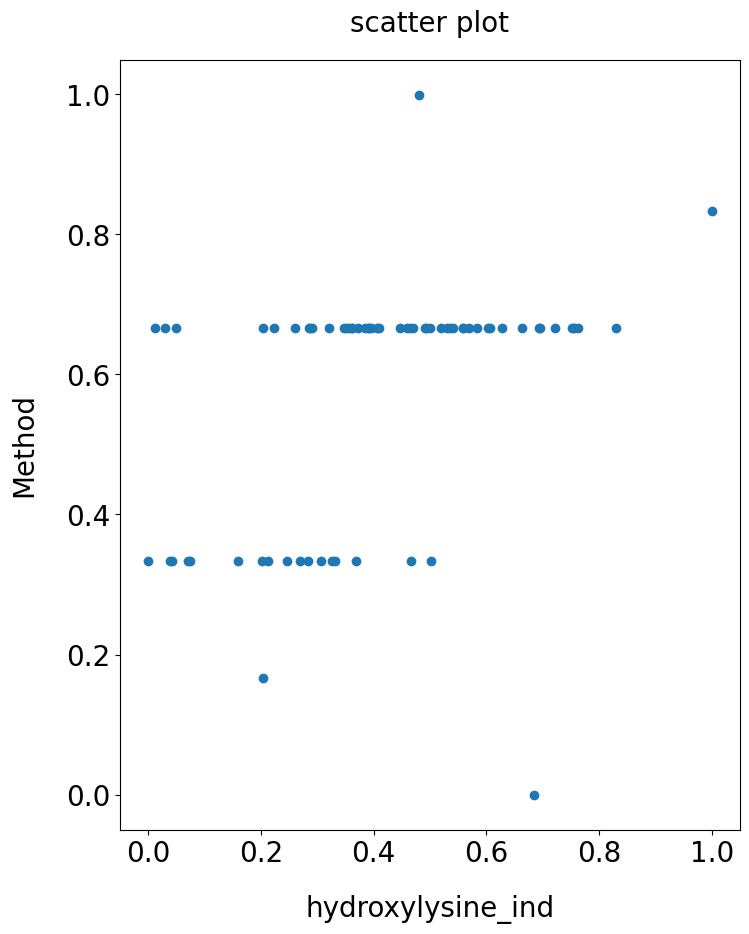

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (8,10))

#plot teh scatter plot
ax.scatter(df_dbscan['hydroxylysine_ind'], df_dbscan['Method'])

#add labels
ax.set_xlabel("hydroxylysine_ind", fontsize = 20, labelpad = 20)
ax.set_ylabel("Method", fontsize = 20, labelpad = 20)
ax.set_title("scatter plot", fontsize = 20, pad = 20)
#alter the tick parametes
ax.tick_params(axis = "both", labelsize = 20)

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_dbscan[['hydroxylysine_ind','Method']])
distances, indices = nbrs.kneighbors(df_dbscan[['hydroxylysine_ind','Method']])
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]


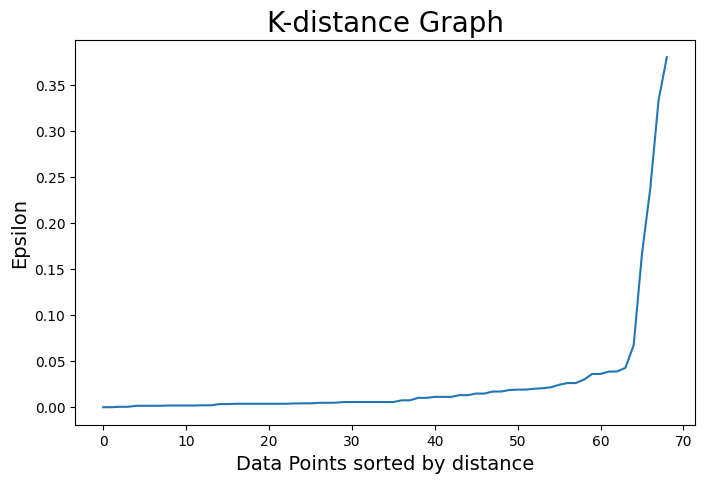

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

Text(0.5, 1.0, 'Outliers Detection using DBSCAN')

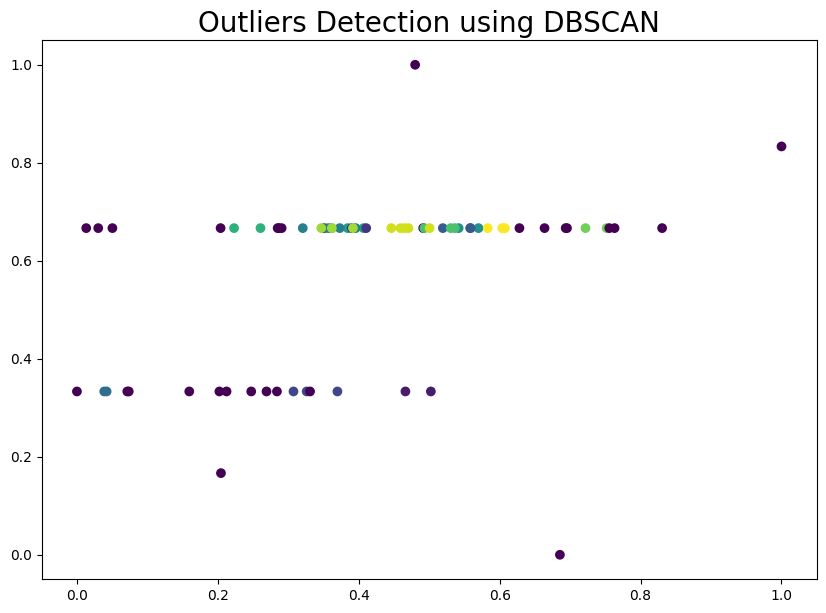

In [ ]:
model = DBSCAN(eps = 0.05, min_samples = 2).fit(df_dbscan)
colors = model.labels_
plt.figure(figsize=(10,7))
plt.scatter(df_dbscan['hydroxylysine_ind'], df_dbscan['Method'], c = colors)
plt.title('Outliers Detection using DBSCAN',fontsize=20)

In [ ]:
from sklearn.cluster import DBSCAN


outlier_detection = DBSCAN(eps = 0.05, metric = "euclidean", min_samples = 10, n_jobs = -1)
#fit_predict the algorithm to the existing data
clusters = outlier_detection.fit_predict(df_dbscan[['hydroxylysine_ind', 'Method']])

#extract the labels from the algorithm
df_dbscan["dbscan_outliers"] = clusters
#label all others as inliers
df_dbscan["dbscan_outliers"] = df_dbscan["dbscan_outliers"].apply(lambda x: str(1) if x>-1 else str(-1))
#print the vaue counts
print(df_dbscan["dbscan_outliers"].value_counts())

-1    39
1     30
Name: dbscan_outliers, dtype: int64


<ipython-input-25-b5cc82bd699c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dbscan["dbscan_outliers"] = clusters
<ipython-input-25-b5cc82bd699c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dbscan["dbscan_outliers"] = df_dbscan["dbscan_outliers"].apply(lambda x: str(1) if x>-1 else str(-1))


In [ ]:

import plotly.express as px

#this plot will be repeated so it is better to create a function
def scatter_plot(dataframe, x, y, color, title, hover_name):
    """Create a plotly express scatter plot with x and y values with a colour

    Input:
        dataframe: Dataframe containing columns for x, y, colour and hover_name data
        x: The column to go on the x axis
        y: Column name to go on the y axis
        color: Column name to specify colour
        title: Title for plot
        hover_name: column name for hover

    Returns:
        Scatter plot figure
    """
    #create the base scatter plot
    fig = px.scatter(dataframe, x = x, y=y,
                    color = color,
                     hover_name = hover_name)
    #set the layout conditions
    fig.update_layout(title = title,
                     title_x = 0.5)
    #show the figure
    fig.show()

scatter_plot(df_dbscan, "hydroxylysine_ind", "Method", "dbscan_outliers",
             "DBScan Outlier Detection",
            "hydroxylysine_ind")

In [ ]:
df_dbscan = df1[[
    "Cell1",
    "Type",
    "Method",
    "%hydroxylysine_ind"
    ]]
df_dbscan.rename(columns = {'%hydroxylysine_ind':'hydroxylysine_ind'}, inplace = True)
df_dbscan

## Roadmap

- [x] Empirical distribution (https://machinelearningmastery.com/empirical-distribution-function-in-python/)

##############################

- [ ] Check distribution of each column (normal, Bernoulli (maybe others))
- [ ] Generate data based on those distributions 🙂

##############################

- [ ] Statistical test for normality

- [ ] Get mean and std if normal and simulate data from those values

- [ ] Oversampling methods (SMOTE)

- [ ] Clusters or Groups

  - [ ] Apply some techniques for simulate data from above

##############################

- [ ] sample (increase variability)
- [ ] see distribution
- [ ] randomize

##############################

- [x] add control patient data -> put type = 0
- [ ] determine OI type for type 9 patients based on other records
- [ ] convert type to categorical
- [ ] check distributions

## Base dataframe

In [ ]:
df_base = df_sel[[
  'ID',
  'Cell1',
  'Age',
  'Sex',
  'Type',
  'Method',
  '%hydroxylysine_ind',
  'errors'
]]
df_base

,ID,Cell1,Age,Sex,Type,Method,%hydroxylysine_ind,errors
1,8,2,1,1,2,2,0.219020,Others
2,15,1,1,2,2,5,0.218750,Others
3,15,2,1,2,2,3,0.371429,Others
4,15,2,1,2,2,3,0.352941,Others
5,25,1,1,1,2,5,0.294000,Others
...,...,...,...,...,...,...,...,...
42,207,1,5,3,10,7,0.243000,Others
43,243,1,2,3,10,7,0.198000,Others
44,265,1,5,3,10,7,0.235000,Others
45,352,1,5,3,10,7,0.210000,Others


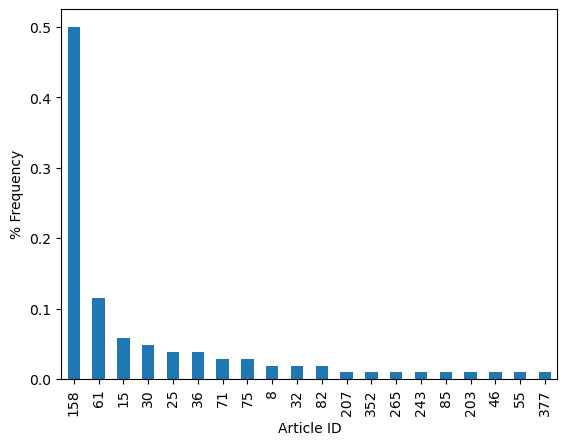

In [ ]:
df_base['ID'].value_counts()

plt.figure()
freq = df_base['ID'].value_counts() / sum(df_base['ID'].value_counts())
freq.plot(kind = 'bar')
plt.xlabel('Article ID')
plt.ylabel('% Frequency')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_47952\606909762.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.displot(
C:\Users\user\AppData\Local\Temp\ipykernel_47952\606909762.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.displot(
C:\Users\user\AppData\Local\Temp\ipykernel_47952\606909762.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.displot(
C:\Users\user\AppData\Local\Temp\ipykernel_47952\606909762.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.displot(


C:\Users\user\AppData\Local\Temp\ipykernel_47952\606909762.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.displot(
C:\Users\user\AppData\Local\Temp\ipykernel_47952\606909762.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.displot(


<Figure size 400x200 with 0 Axes>

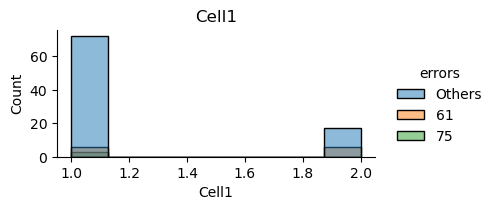

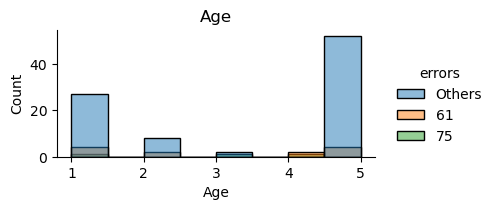

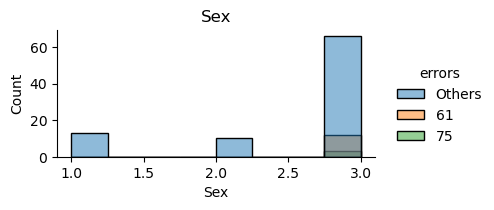

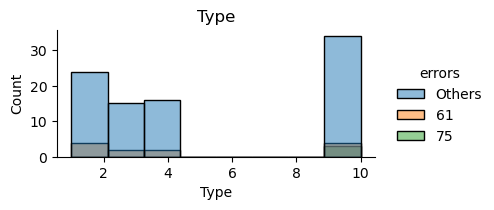

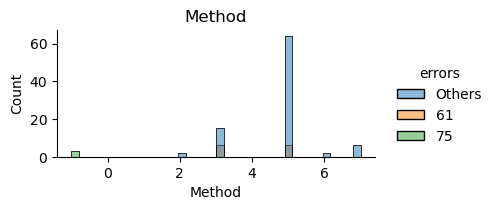

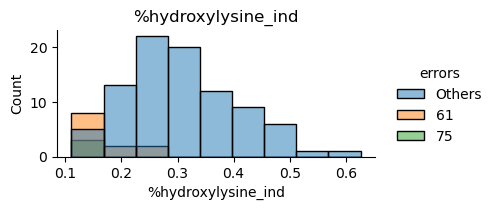

In [ ]:
columns = [
    'Cell1', 'Age', 'Sex', 'Type', 'Method', '%hydroxylysine_ind'
]
plt.figure(figsize=(4,2))
for c in columns:
    sns.displot(
        df_base, x = c,
        hue="errors",
        palette = sns.color_palette(),
        height = 2,
        aspect=2
    )
    plt.title(c)
plt.show()

- [ ] Sex seems odd.What does the values mean?

In [ ]:
df_base.Sex.unique()

array([1, 2, 3], dtype=int64)

- [ ] Dropping Sex and Age because they have too much imputated data.

In [ ]:
df_base = df_base[[
    'ID',
    'Cell1',
    'Age',
    'Sex',
    'Type',
    'Method',
    '%hydroxylysine_ind',
    'errors'
]]
df_base

,ID,Cell1,Age,Sex,Type,Method,%hydroxylysine_ind,errors
1,8,2,1,1,2,2,0.219020,Others
2,15,1,1,2,2,5,0.218750,Others
3,15,2,1,2,2,3,0.371429,Others
4,15,2,1,2,2,3,0.352941,Others
5,25,1,1,1,2,5,0.294000,Others
...,...,...,...,...,...,...,...,...
42,207,1,5,3,10,7,0.243000,Others
43,243,1,2,3,10,7,0.198000,Others
44,265,1,5,3,10,7,0.235000,Others
45,352,1,5,3,10,7,0.210000,Others


Empty values that can be droped. None.

In [ ]:
df_base[df_base.isna().any(axis=1)]

,ID,Cell1,Type,Method,%hydroxylysine_ind,errors


## Prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_squared_error as RMSE

import xgboost as xgb

In [ ]:
df_base.columns

Index(['ID', 'Cell1', 'Type', 'Method', '%hydroxylysine_ind', 'errors'], dtype='object')

In [ ]:
x_col = [
    'Cell1',
    'Age',
    'Sex',
    'Type',
    'Method']
y_col = ['%hydroxylysine_ind']

### Train and test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_base[x_col], df_base[y_col], test_size = 0.3)

### Best result by random folds

In [ ]:
xgb_r = xgb.XGBRegressor()

cv = RepeatedKFold(n_splits=10, n_repeats=3)
# evaluate model
scores = cross_val_score(xgb_r, df_sel[x_col], df_sel[y_col], scoring='neg_mean_absolute_percentage_error', cv = cv, n_jobs = -1)
scores = abs(scores)
print('Mean MAPE: %.3f; Sdv MAPE: %.3f' % (scores.mean(), scores.std()) )

Mean MAPE: 0.255; Sdv MAPE: 0.101


### GridSearch

- [ ] DOE for explore the best values instead of only doing a GridSearchCV

In [ ]:
# https://machinelearningmastery.com/xgboost-for-regression/
xgb_r = xgb.XGBRegressor(eval_metric = 'rmsle')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor
param_grid = {
    "max_depth" :    [4, 5, 6],
    "n_estimators" : [600, 700, 800],
    "learning_rate" : [0.05, 0.1, 0.15],
    # "colsample_bytree" : [1, 5/6, 4/6, 3/6]
}

# try out every combination of the above values
search = GridSearchCV(xgb_r, param_grid, cv = cv).fit(x_train, y_train)

print("The best hyperparameters are ", search.best_params_)

The best hyperparameters are  {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 600}


In [ ]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
0,0.124940,0.010724,0.003105,0.000525,0.05,4,600,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est...",-0.204088,0.297535,...,-0.108803,0.377131,0.413786,-0.028253,0.112258,-0.162864,0.363707,-0.184059,1.521568,4
1,0.143444,0.006511,0.002904,0.000571,0.05,4,700,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est...",-0.204088,0.297535,...,-0.108803,0.377131,0.413786,-0.028253,0.112258,-0.162864,0.363707,-0.184059,1.521568,4
2,0.171823,0.015359,0.002906,0.000689,0.05,4,800,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est...",-0.204088,0.297535,...,-0.108803,0.377131,0.413786,-0.028253,0.112258,-0.162864,0.363707,-0.184059,1.521568,4
3,0.128333,0.017362,0.002853,0.000468,0.05,5,600,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",-0.249771,0.296364,...,-0.109230,0.364800,0.412809,-0.098685,0.110325,-0.178207,0.363512,-0.191245,1.522942,16
4,0.150133,0.022149,0.002921,0.000532,0.05,5,700,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",-0.249771,0.296364,...,-0.109230,0.364800,0.412809,-0.098685,0.110325,-0.178207,0.363512,-0.191245,1.522942,16
5,0.171033,0.023443,0.002805,0.000479,0.05,5,800,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",-0.249771,0.296364,...,-0.109230,0.364800,0.412809,-0.098685,0.110325,-0.178207,0.363512,-0.191245,1.522942,16
6,0.131146,0.004262,0.002870,0.000482,0.05,6,600,"{'learning_rate': 0.05, 'max_depth': 6, 'n_est...",-0.240069,0.295615,...,-0.108820,0.365526,0.412750,-0.092915,0.109000,-0.191642,0.364385,-0.192448,1.523837,22
7,0.152552,0.006399,0.003271,0.001584,0.05,6,700,"{'learning_rate': 0.05, 'max_depth': 6, 'n_est...",-0.240069,0.295615,...,-0.108820,0.365526,0.412750,-0.092915,0.109000,-0.191642,0.364385,-0.192448,1.523837,22
8,0.170902,0.014162,0.002888,0.000602,0.05,6,800,"{'learning_rate': 0.05, 'max_depth': 6, 'n_est...",-0.240069,0.295615,...,-0.108820,0.365526,0.412750,-0.092915,0.109000,-0.191642,0.364385,-0.192448,1.523837,22
9,0.115817,0.004093,0.002854,0.000470,0.1,4,600,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",-0.208710,0.296688,...,-0.110826,0.382168,0.412537,-0.022608,0.112245,-0.161494,0.362980,-0.185035,1.528866,7


In [ ]:
d = []
for r in range(10):
    for test_size in [0.1, 0.2, 0.3, 0.4]:
        x_train, x_test, y_train, y_test = train_test_split(df_sel[x_col], df_sel[y_col], test_size = 0.2)
        xgb_r = xgb.XGBRegressor(
            max_depth     = search.best_params_["max_depth"],
            n_estimators  = search.best_params_["n_estimators"],
            learning_rate = search.best_params_["learning_rate"],
            # colsample_bytree = search.best_params_["colsample_bytree"],
            eval_metric='rmsle'
        )

        xgb_r.fit(x_train, y_train)
        y_pred = xgb_r.predict(x_test)
        mape = np.sqrt(MAPE(y_test, y_pred))
        # print(f"MAPE: {round(mape, 4)}")

        rmse = np.sqrt(RMSE(y_test, y_pred))
        # print(f"RMSE: {round(rmse, 4)}")

        d.append({
            'r' : r,
            'test_size' : test_size,
            'mape' : mape
        })

In [ ]:
pd.DataFrame(d)

,r,test_size,mape
0,0,0.1,0.542354
1,0,0.2,0.491802
2,0,0.3,0.531919
3,0,0.4,0.624551
4,1,0.1,0.576395
5,1,0.2,0.490373
6,1,0.3,0.422376
7,1,0.4,0.490598
8,2,0.1,0.470141
9,2,0.2,0.601111


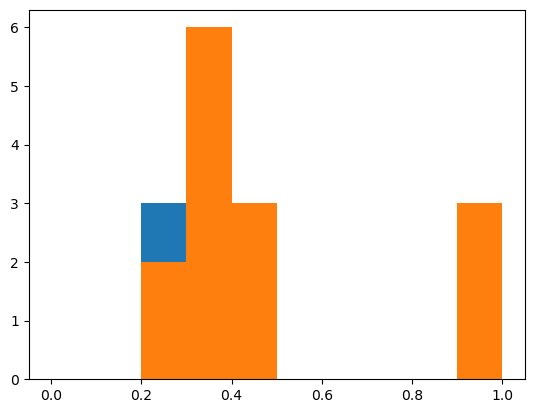

In [ ]:
plt.hist(y_test, bins = [x * 0.1 for x in list(range(0, 11))])
plt.hist(y_pred, bins = [x * 0.1 for x in list(range(0, 11))])
plt.show()

## Empirical simulation

### Unit test

In [ ]:
df_base['ID'].value_counts()

158    39
61      8
30      4
15      3
75      3
25      2
6       1
8       1
32      1
36      1
46      1
55      1
71      1
82      1
85      1
144     1
Name: ID, dtype: int64

<Axes: >

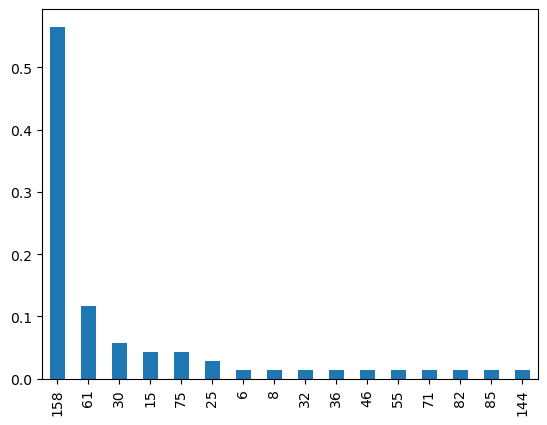

In [ ]:
freq = df_base['ID'].value_counts() / sum(df_base['ID'].value_counts())
freq.plot(kind = 'bar')

In [ ]:
np.random.choice(
  a = df_base['ID'].value_counts().index,
  size = 50,
  p = df_base['ID'].value_counts() / sum(df_base['ID'].value_counts())
)

array([144, 158,  82,  15, 158, 158,  82, 158, 158,  55, 158,  36, 158,
       158,  55,  61,  30, 158, 158, 158, 158,  36, 144, 158,  71,  61,
         8, 158,  55,  32, 158,  30, 158,  30,  25,  30, 158, 158, 158,
        75, 158, 158,  85, 158,  46,  25, 158, 158, 158, 158], dtype=int64)

## Reconstruction method

In [ ]:
from imblearn.combine import SMOTEENN

### Model

In [ ]:
def empirical_simulator(df, col, n):
  df[col].value_counts()
  simulated_data = np.random.choice(
    a = df[c].value_counts().index,
    size = n,
    p = df[c].value_counts() / sum(df[c].value_counts())
  )
  return simulated_data

### Simulated data

In [ ]:
new_data = {}
for c in df_final.columns:
  new_data[c] = empirical_simulator(df_final, c, 1000)
df_empirical_simulated = pd.DataFrame(new_data)

### Visualization

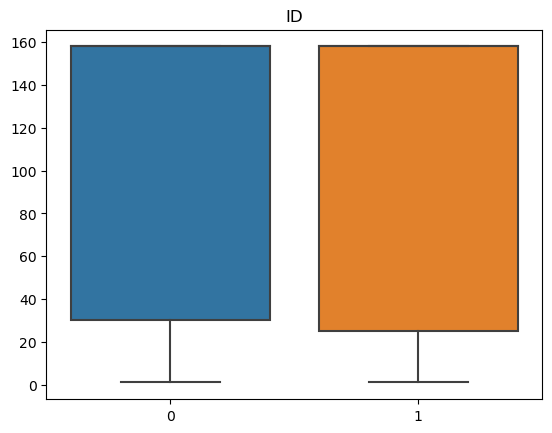

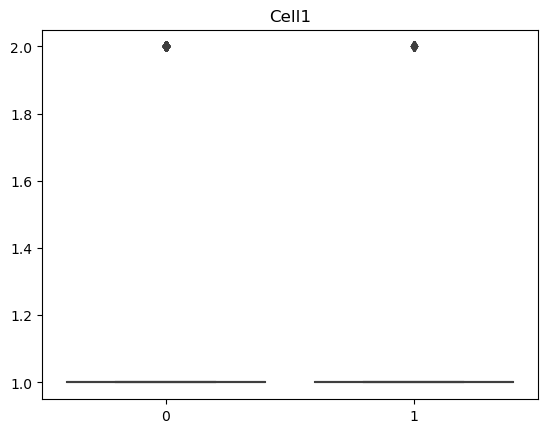

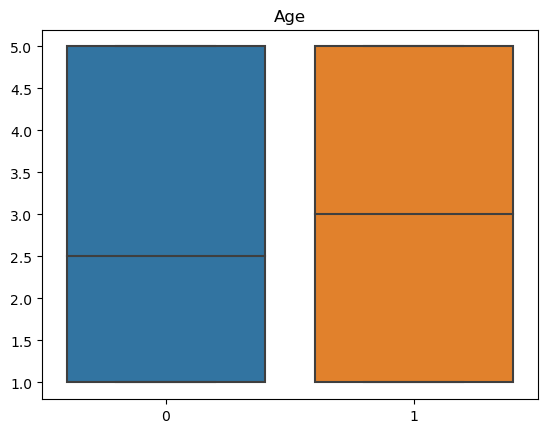

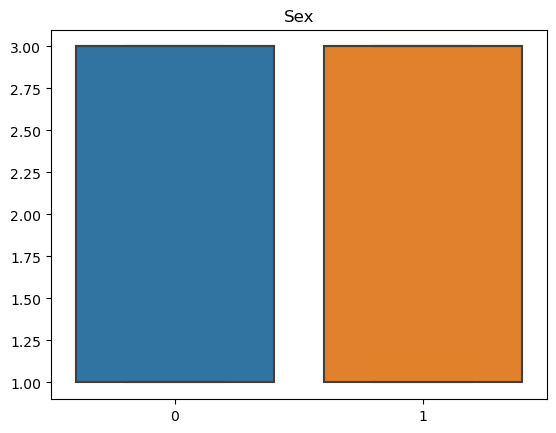

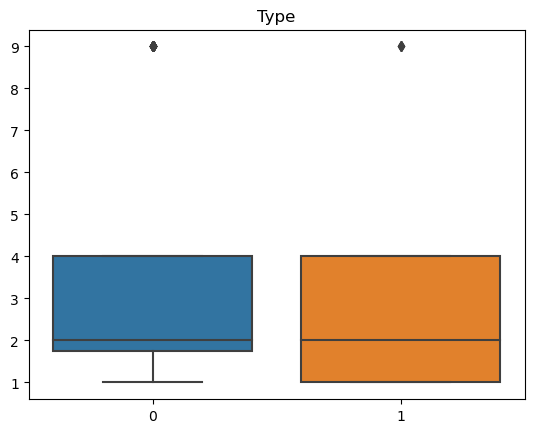

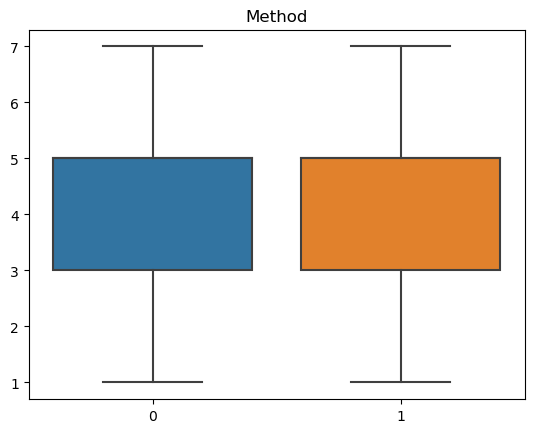

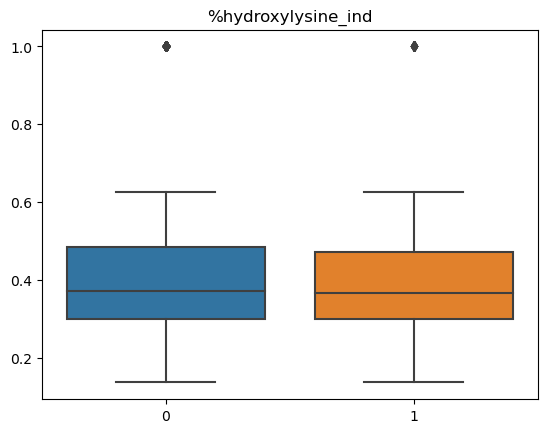

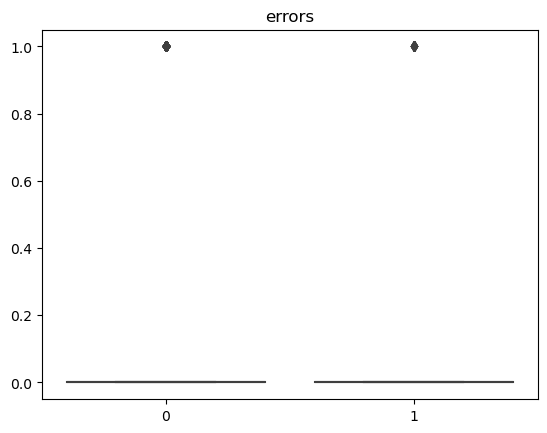

In [ ]:
for c in df_final.columns:
  plt.figure()
  plt.title(c)
  sns.boxplot(
    data=[df_empirical_simulated[c], df_final[c]])
  plt.show()

## Normality simulation

In [ ]:
import pingouin as pg

In [ ]:
df_final.columns

Index(['ID', 'Cell1', 'Age', 'Sex', 'Type', 'Method', '%hydroxylysine_ind',
       'errors'],
      dtype='object')

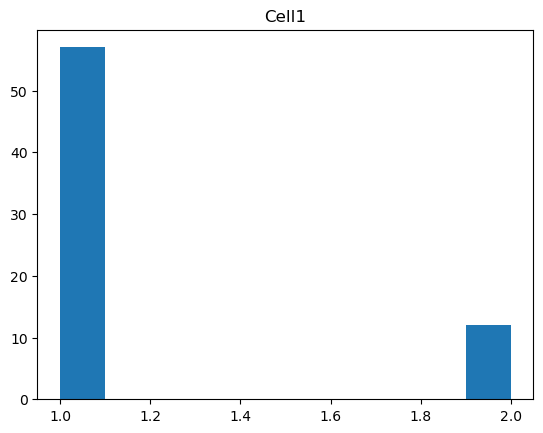

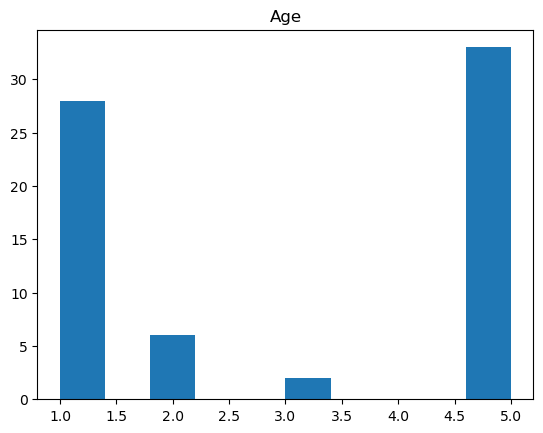

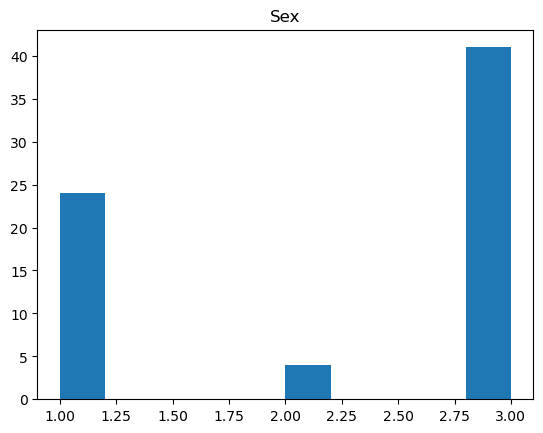

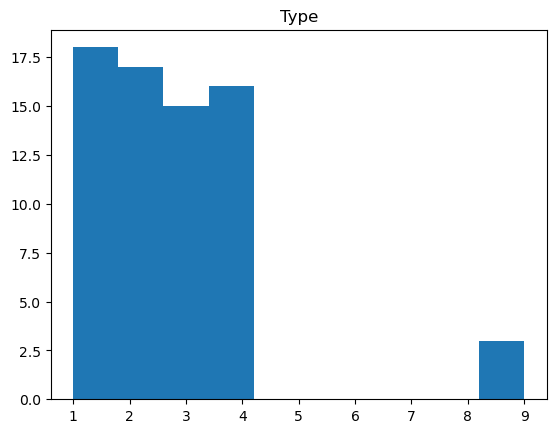

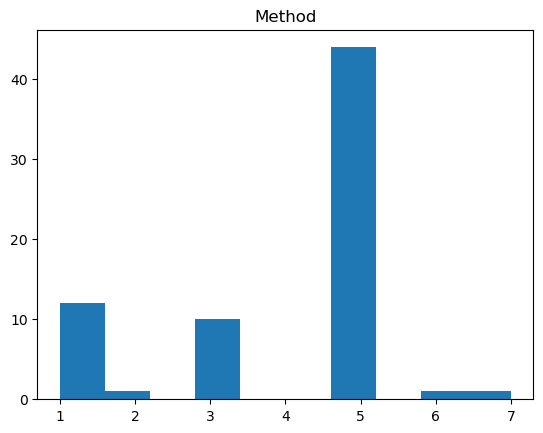

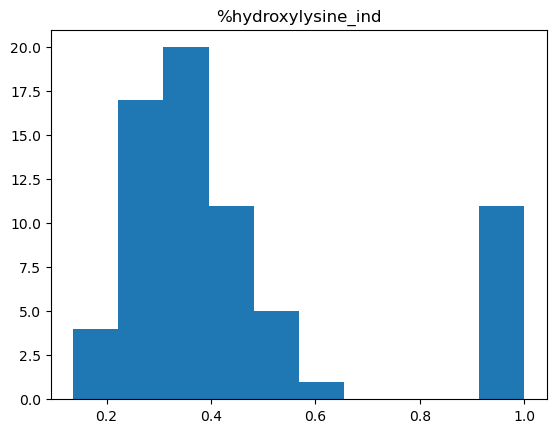

In [ ]:
for c in ['Cell1', 'Age', 'Sex', 'Type', 'Method', '%hydroxylysine_ind']:
    plt.figure()
    plt.hist(df_final[c])
    plt.title(c)
    plt.show()

In [ ]:
df_final.Sex.unique()

array([1, 2, 3], dtype=int64)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

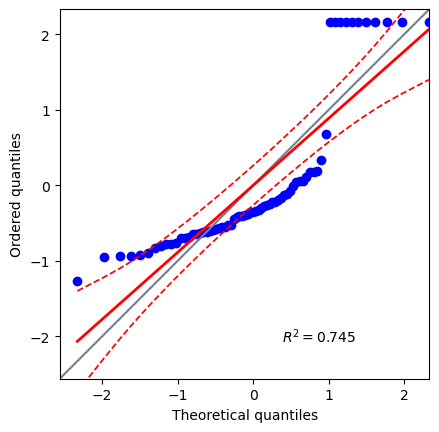

In [ ]:
pg.qqplot(df_final['%hydroxylysine_ind'], dist='norm')

In [ ]:
print(pg.normality(df_final['%hydroxylysine_ind']))

                           W          pval  normal
%hydroxylysine_ind  0.739249  9.521427e-10   False


In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.OLS(
    df_final['%hydroxylysine_ind'],
    df_final[['Cell1', 'Age', 'Sex', 'Type', 'Method', '%hydroxylysine_ind']]
)

In [ ]:
results = model.fit()
results.params

Cell1                -1.387779e-17
Age                  -3.122502e-17
Sex                   8.326673e-17
Type                  1.804112e-16
Method               -1.075529e-16
%hydroxylysine_ind    1.000000e+00
dtype: float64